In [1]:
import numpy as np
import matplotlib.pyplot as plt
random_seed=42

In [2]:
from sklearn import datasets
iris = datasets.load_iris()

In [3]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

Attribute Information:
- sepal length in cm
- sepal width in cm
- petal length in cm
- petal width in cm

## First Exercise 
#### I am just trying to classify _Iris-Virginica_, class 2, from the others using one feature, petal width. 

In [5]:
X = iris["data"][:, 3:]  # petal width

In [6]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
y=(iris['target']==2).astype(int)

In [8]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
log_reg=LogisticRegression()

In [11]:
log_reg.fit(X,y)

LogisticRegression()

### Visualizing the regression 

In [12]:
X.max(), X.min()

(2.5, 0.1)

In [13]:
X[y==1].max(), X[y==1].min()

(2.5, 1.4)

In [14]:
X[y==0].max(), X[y==0].min()

(1.8, 0.1)

There is an overlap between virginica and others in the range 1.4 - 1.8 cm

I will create a space in which we will plot the model to visualize it. 

In [15]:
X_new=np.linspace(0,3,1000).reshape(-1,1)

In [16]:
y_proba=log_reg.predict_proba(X_new)

In [17]:
y_proba[:,1] # array of prob of being Iris Virginicus for each of the 1000 points

array([7.49984089e-04, 7.59799387e-04, 7.69743043e-04, 7.79816732e-04,
       7.90022153e-04, 8.00361024e-04, 8.10835088e-04, 8.21446109e-04,
       8.32195877e-04, 8.43086202e-04, 8.54118919e-04, 8.65295886e-04,
       8.76618985e-04, 8.88090125e-04, 8.99711238e-04, 9.11484280e-04,
       9.23411234e-04, 9.35494108e-04, 9.47734937e-04, 9.60135782e-04,
       9.72698731e-04, 9.85425898e-04, 9.98319426e-04, 1.01138149e-03,
       1.02461427e-03, 1.03802002e-03, 1.05160097e-03, 1.06535943e-03,
       1.07929769e-03, 1.09341812e-03, 1.10772307e-03, 1.12221497e-03,
       1.13689623e-03, 1.15176935e-03, 1.16683681e-03, 1.18210115e-03,
       1.19756493e-03, 1.21323076e-03, 1.22910127e-03, 1.24517913e-03,
       1.26146703e-03, 1.27796772e-03, 1.29468397e-03, 1.31161859e-03,
       1.32877442e-03, 1.34615434e-03, 1.36376127e-03, 1.38159818e-03,
       1.39966805e-03, 1.41797392e-03, 1.43651886e-03, 1.45530599e-03,
       1.47433846e-03, 1.49361946e-03, 1.51315223e-03, 1.53294005e-03,
      

C:\Users\arsha\Anaconda3\lib\site-packages\matplotlib\patches.py:1338: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  verts = np.dot(coords, M) + (x + dx, y + dy)


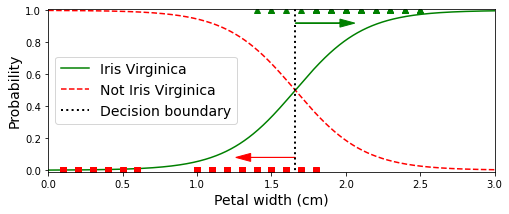

In [18]:
plt.figure(figsize=(8, 3))
plt.plot(X_new,y_proba[:,1],'g-',label="Iris Virginica")
plt.plot(X_new,y_proba[:,0],'r--',label="Not Iris Virginica")
plt.plot(X[y==1], y[y==1], "g^") # green triangles
plt.plot(X[y==0], y[y==0], "rs") # Not = red squares

decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]
plt.plot([decision_boundary, decision_boundary], [-0.1, 1.1], "k:", linewidth=2,label='Decision boundary') # dotted black line
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='r', ec='r')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.01, 1.01])
plt.show()

In [19]:
# Working of the decision boundary
decision_boundary

array([1.66066066])

In [20]:
log_reg.predict([[1.6], [1.7]])

array([0, 1])

If we force the model to predict around boundary, it goes by slighly less or above 50% chance. 

## Second Exercise:
####  Now I will introduce a new feature, Petal Width. Still only trying to classify Iris Virginica

In [21]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)


In [22]:
log_reg = LogisticRegression()
#log_reg = LogisticRegression(solver="liblinear", C=10**10, random_state=42)
# using very high C, very unregularized model

In [23]:
log_reg.fit(X,y)

LogisticRegression()

In [24]:
max(X[:,1]), min(X[:,1]) #variation of petal length

(2.5, 0.1)

In [25]:
max(X[:,1][y==1]), min(X[:,1][y==1]) #variation of petal length for Virginica

(2.5, 1.4)

In [26]:
max(X[:,1][y==0]), min(X[:,1][y==0]) #variation of petal length for others

(1.8, 0.1)

In [27]:
max(X[:,0]), min(X[:,0]) #variation of petal width

(6.9, 1.0)

In [28]:
max(X[:,0][y==1]), min(X[:,0][y==1]) #variation of petal width for Virginica

(6.9, 4.5)

In [29]:
max(X[:,0][y==0]), min(X[:,0][y==0]) #variation of petal width for others

(5.1, 1.0)

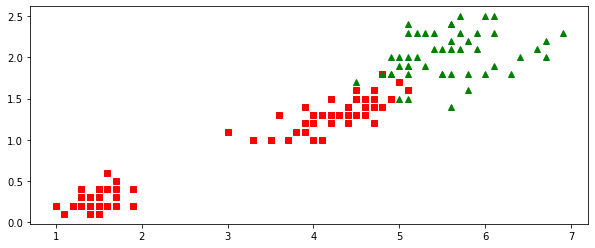

In [30]:
plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "rs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

Since we are intersted in making a boundry between red sq and green triangles, we will ignore the lower cluster and focus on the space exclosed by x=[2.9,7] and y=[0.8,2.8]

(2.9, 7.0, 0.8, 2.7)

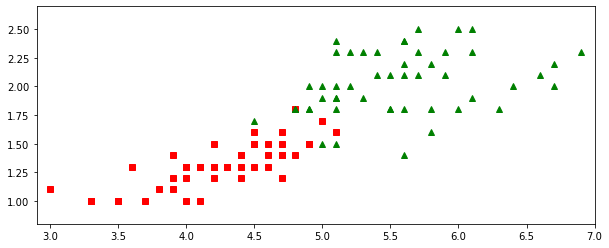

In [31]:
plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "rs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")
plt.axis([2.9, 7, 0.8, 2.7])

Like before, we will make a 2-D space in which to visualize the model.

In [32]:
x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )

In [33]:
X_new = np.c_[x0.ravel(), x1.ravel()]
len(X_new)

100000

In [34]:
y_predict=log_reg.predict(X_new)

In [35]:
y_proba = log_reg.predict_proba(X_new)

In [36]:
zz = y_proba[:, 1].reshape(x0.shape)

In [37]:
len(zz)

200

In [38]:
left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]
boundary

array([ 3.97942458, -0.79448756])

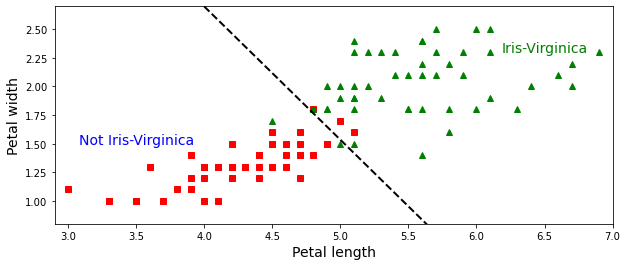

In [39]:
plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "rs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

#contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)
#plt.clabel(contour, inline=1, fontsize=12)
# plot decision boundary

plt.plot(left_right, boundary, "k--", linewidth=2)

plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()


Note that adding petal length has not made the predictions much better: 2 of the Virginica classified as not, and 3 of not classified as Virginica, compared to earlier model with only petal width, where the numbers were 3 and 2 respectively. 

In [40]:
X = iris["data"][:, :]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

In [42]:
log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

In [43]:
y_predict=log_reg.predict(X)

In [44]:
y - y_predict

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

If we use all features, we still get 1 Viginica as not, and 3 not as Virginica